In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
data=pd.read_csv('Used_Car_Dataset.csv')

In [28]:
data.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [30]:
data.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [31]:
data['mileage(kmpl)']=data['mileage(kmpl)'].fillna(data['mileage(kmpl)'].mean())
data['engine(cc)']=data['engine(cc)'].fillna(data['engine(cc)'].mean())
data['max_power(bhp)']=data['max_power(bhp)'].fillna(data['max_power(bhp)'].mean())
data['torque(Nm)']=data['torque(Nm)'].fillna(data['torque(Nm)'].mean())

In [32]:
data.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [33]:
data=data.drop(['car_name'],axis=1)

In [34]:
data.head()

,Unnamed: 0,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [35]:
data['registration_year'] = data['registration_year'].astype(str)
data['registration_year'] = data['registration_year'].str.slice(4,6)
data['registration_year'] = pd.to_numeric(data['registration_year'], errors='coerce').fillna(0).astype(int)
data['manufacturing_year']=pd.to_numeric(data['manufacturing_year'], errors='coerce').fillna(0).astype(int)

In [36]:
# not a good method 
# data=pd.get_dummies(data,columns=['fuel_type','transmission','insurance_validity','ownsership'],drop_first=True)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fuel_type'] = labelencoder.fit_transform(data['fuel_type']).astype(int)
data['ownsership']=labelencoder.fit_transform(data['ownsership']).astype(int)
data['insurance_validity']=labelencoder.fit_transform(data['insurance_validity']).astype(int)
data['transmission']=labelencoder.fit_transform(data['transmission']).astype(int)

In [37]:
data.head()

,Unnamed: 0,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,17,0,3,5,56000,19,10,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,21,0,3,5,30615,19,10,2020,17.40,999.0,999.0,9863.0,8.99
2,2,18,0,2,5,24000,19,10,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,19,0,3,5,18378,19,11,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,19,0,3,5,44900,19,10,2019,14.67,1798.0,1798.0,17746.0,24.00


In [38]:
datatype=data.dtypes
print(datatype)

Unnamed: 0              int64
registration_year       int32
insurance_validity      int32
fuel_type               int32
seats                   int64
kms_driven              int64
ownsership              int32
transmission            int32
manufacturing_year      int32
mileage(kmpl)         float64
engine(cc)            float64
max_power(bhp)        float64
torque(Nm)            float64
price(in lakhs)       float64
dtype: object


In [39]:
data=(data-data.mean())/data.std()

In [40]:
split=0.8

train_x=data.drop('price(in lakhs)',axis=1)[0:int(len(data)*split)]
train_y=data['price(in lakhs)'][0:int(len(data)*split)]

train_x=train_x.values
train_y=train_y.values

test_x=data.drop('price(in lakhs)',axis=1)[int(len(data)*split):]
test_y=data['price(in lakhs)'][int(len(data)*split):]

test_x=test_x.values
test_y=test_y.values

ones=np.ones((train_x.shape[0],1))
train_x=np.concatenate((ones,train_x),axis=1)

ones=np.ones((test_x.shape[0],1))
test_x=np.concatenate((ones,test_x),axis=1)

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(1242, 14) (1242,) (311, 14) (311,)


In [41]:
def hypothesis(x,w):
    return np.dot(x,w)

In [42]:
def loss_function(x,y,w):
    y_p = hypothesis(x, w)
    y=y.reshape(-1,1)
    error = (y_p - y)**2
    return error/(x.shape[0]) 

In [43]:
def gradient(x,y,w):
    y_p = hypothesis(x, w)
    y=y.reshape(-1,1)
    grad = np.dot(x.T, (y_p-y))
    return grad/(x.shape[0])

In [44]:
def gradient_descent(x,y):
    weight = np.zeros((x.shape[1], 1))
    learning_rate=0.03
    epochs=2000
    error_list=[]
    for i in range(epochs):
        error=loss_function(x,y,weight)
        error=np.array(error).mean()
        error_list.append(error) 
        weight=weight-learning_rate*gradient(x,y,weight)
    return weight,error_list

In [45]:
w,loss=gradient_descent(train_x,train_y)

In [46]:
print(w)

[[-0.02610649]
 [-0.0488661 ]
 [-0.04048588]
 [-0.02701009]
 [ 0.02346235]
 [ 0.00025703]
 [ 0.0124236 ]
 [ 0.07584967]
 [ 0.02733256]
 [-0.03741871]
 [ 0.08189863]
 [-0.01038426]
 [-0.01038426]
 [ 0.00105511]]


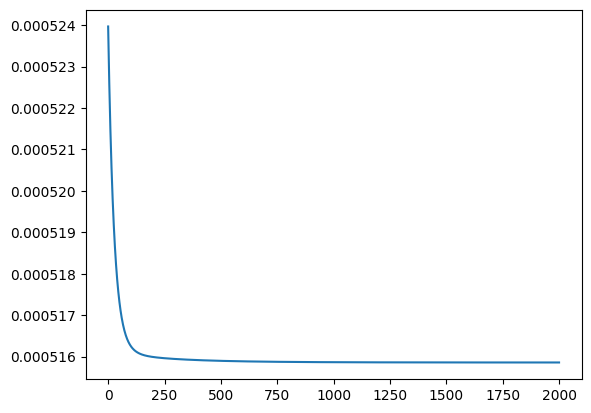

In [47]:
plt.plot(np.arange(len(loss)),loss)

In [48]:
y_pred=hypothesis(test_x,w)
print(y_pred,test_y)

[[ 0.04704364]
 [-0.01323178]
 [-0.00556764]
 [ 0.10571417]
 [-0.09488692]
 [ 0.10456605]
 [ 0.00708763]
 [-0.03206047]
 [ 0.04701832]
 [-0.12266263]
 [-0.13229972]
 [-0.03551217]
 [-0.11855376]
 [-0.05677256]
 [-0.17624948]
 [-0.12948232]
 [-0.10996068]
 [-0.07538433]
 [-0.13487631]
 [-0.15357209]
 [ 0.20443175]
 [-0.09640771]
 [-0.106141  ]
 [ 0.06778393]
 [-0.07374604]
 [-0.13408489]
 [ 0.00410428]
 [-0.18615581]
 [-0.06832251]
 [-0.10693904]
 [-0.09368512]
 [-0.10662151]
 [-0.00197182]
 [-0.01319486]
 [-0.11111056]
 [ 0.06146279]
 [-0.10437011]
 [-0.06967623]
 [-0.15151917]
 [-0.05924445]
 [ 0.16790014]
 [ 0.07254775]
 [-0.10037449]
 [-0.17022596]
 [-0.08390573]
 [-0.52942199]
 [-0.19208612]
 [-0.09938883]
 [-0.06224074]
 [-0.33232278]
 [-0.10110695]
 [-0.11305605]
 [-0.19715066]
 [ 0.10700009]
 [-0.10215217]
 [-0.11349191]
 [-0.0589109 ]
 [ 0.23458756]
 [-0.19780445]
 [-0.04982112]
 [-0.08706401]
 [-0.10892978]
 [-0.15014924]
 [-0.12575218]
 [-0.08943893]
 [ 0.38679158]
 [-0.08701